In [1]:
# Packages

import gensim.downloader
import spacy

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA

In [3]:
# Read corpus from file
with open('documents.txt') as f:
    corpus = f.read().splitlines()

In [4]:
################
# Normalize ####
################
stop_words = nltk.corpus.stopwords.words('english')
wpt = nltk.WordPunctTokenizer()

In [5]:
# We want to normalize it, get rid of some additional words
def normalize_document(doc):
    doc = re.sub(r'[^\w\s]', '', doc)
    doc = doc.lower()           # we lowercase everything
    doc = doc.strip()           # we strip white spaces
    tokens = wpt.tokenize(doc)
    filtered_tokens = [token for token in tokens if token not in stop_words]
    doc = ' '.join(filtered_tokens)
    return doc

In [6]:
normalize_corpus = np.vectorize(normalize_document)
normalized_corpus = normalize_corpus(corpus)
normalized_corpus
# Now we'll have a list of clean documents. This is where we want to start.

array(['sky blue beautiful', 'love blue beautifl sky',
       'quick brown fox jumps lazy dog',
       'kings breakfast sausages ham bacon eggs toast eans',
       'love green eggs ham sausages bacon',
       'brown fox quick blue dog lazy', 'sky blue sky beautiful today',
       'dog lazy brown fox quick'], dtype='<U50')

In [7]:
################
# Bag of Words # Normalization!!!
################

vectorizer = CountVectorizer()
# vectorizer = CountVectorizer(ngram_range(1,2))    # here we could also take the bigrams with the 2. So we get unigrams and bigrams!
# vectorizer = CountVectorizer(ngram_range(1,2), min_df=3)    # mind_df=3 word should occur in a minimum of 3 docs, we eliminate typos this way!
vectorizer = TfidfVectorizer()                       # by default he normalizes stuff!
features = vectorizer.fit_transform(normalized_corpus)
feature_names = vectorizer.get_feature_names_out(features)
pd.DataFrame(features.toarray(), columns=feature_names, index=corpus)

,bacon,beautifl,beautiful,blue,breakfast,brown,dog,eans,eggs,fox,...,ham,jumps,kings,lazy,love,quick,sausages,sky,toast,today
The sky is blue and beautiful,0.000000,0.000000,0.656949,0.497041,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.566893,0.000000,0.000000
Love this blue and beautifl sky,0.000000,0.616927,0.000000,0.391181,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.517033,0.000000,0.000000,0.446157,0.000000,0.000000
The quick brown fox jumps over the lazy dog.,0.000000,0.000000,0.000000,0.000000,0.000000,0.380362,0.380362,0.000000,0.000000,0.380362,...,0.000000,0.525949,0.000000,0.380362,0.000000,0.380362,0.000000,0.000000,0.000000,0.000000
"A King's breakfast has sausages, ham, bacon, eggs, toast and eans",0.321164,0.000000,0.000000,0.000000,0.383215,0.000000,0.000000,0.383215,0.321164,0.000000,...,0.321164,0.000000,0.383215,0.000000,0.000000,0.000000,0.321164,0.000000,0.383215,0.000000
"I love green eggs, ham, sausages and bacon!",0.394554,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.394554,0.000000,...,0.394554,0.000000,0.000000,0.000000,0.394554,0.000000,0.394554,0.000000,0.000000,0.000000
The brown fox is quick and the blue dog is lazy!,0.000000,0.000000,0.000000,0.365048,0.000000,0.416351,0.416351,0.000000,0.000000,0.416351,...,0.000000,0.000000,0.000000,0.416351,0.000000,0.416351,0.000000,0.000000,0.000000,0.000000
The sky is very blue and the sky is very beautiful today,0.000000,0.000000,0.409113,0.309530,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.706061,0.000000,0.488156
The dog is lazy but the brown fox is quick,0.000000,0.000000,0.000000,0.000000,0.000000,0.447214,0.447214,0.000000,0.000000,0.447214,...,0.000000,0.000000,0.000000,0.447214,0.000000,0.447214,0.000000,0.000000,0.000000,0.000000


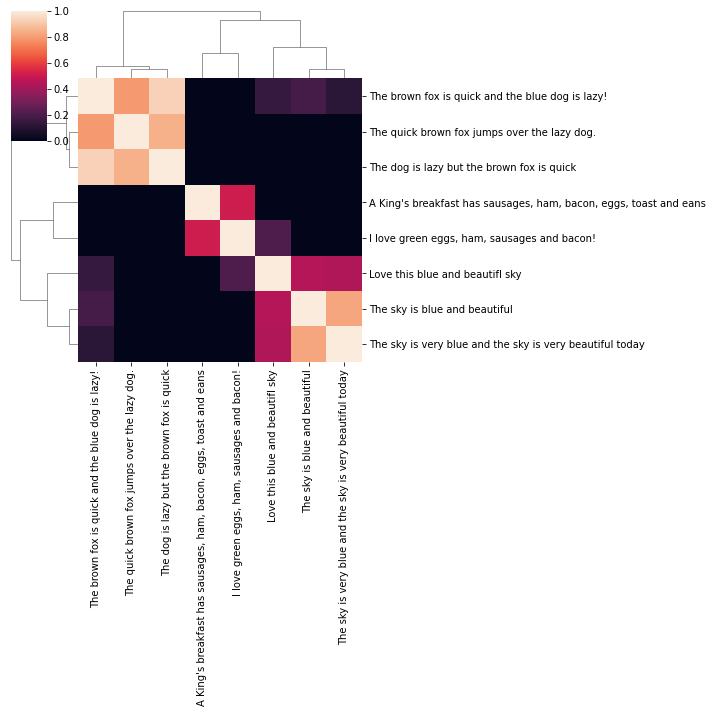

In [8]:
similarity = cosine_similarity(features)
sns.clustermap(similarity, yticklabels=corpus, xticklabels=corpus)

In [9]:
# Get the closest sentences
np.fill_diagonal(similarity, np.nan)
closest = np.nanargmax(similarity, axis=0)
pd.DataFrame([(corpus[i], corpus[j]) for i, j in enumerate(closest)])

,0,1
0,The sky is blue and beautiful,The sky is very blue and the sky is very beaut...
1,Love this blue and beautifl sky,The sky is blue and beautiful
2,The quick brown fox jumps over the lazy dog.,The dog is lazy but the brown fox is quick
3,"A King's breakfast has sausages, ham, bacon, e...","I love green eggs, ham, sausages and bacon!"
4,"I love green eggs, ham, sausages and bacon!","A King's breakfast has sausages, ham, bacon, e..."
5,The brown fox is quick and the blue dog is lazy!,The dog is lazy but the brown fox is quick
6,The sky is very blue and the sky is very beaut...,The sky is blue and beautiful
7,The dog is lazy but the brown fox is quick,The brown fox is quick and the blue dog is lazy!


In [10]:
# Feature Engineering -> text to numeric
list(gensim.downloader.info()['models'].keys())
wv = gensim.downloader.load('glove-wiki-gigaword-50')
#wv = gensim.downloader.load('word2vec-google-news-300')

In [11]:
wv["car"]
wv.similarity("good", "better")

0.92843896

In [12]:
wv.most_similar("car")

[('truck', 0.92085862159729),
 ('cars', 0.8870189785957336),
 ('vehicle', 0.8833683729171753),
 ('driver', 0.8464019298553467),
 ('driving', 0.8384189009666443),
 ('bus', 0.8210511803627014),
 ('vehicles', 0.8174992799758911),
 ('parked', 0.7902189493179321),
 ('motorcycle', 0.7866503000259399),
 ('taxi', 0.7833929657936096)]

In [13]:
wv.most_similar(positive=['king', 'woman'], negative='man')

[('queen', 0.8523604273796082),
 ('throne', 0.7664334177970886),
 ('prince', 0.7592144012451172),
 ('daughter', 0.7473883628845215),
 ('elizabeth', 0.7460219860076904),
 ('princess', 0.7424570322036743),
 ('kingdom', 0.7337412238121033),
 ('monarch', 0.721449077129364),
 ('eldest', 0.7184861898422241),
 ('widow', 0.7099431157112122)]

In [14]:
# Identify similar documents
# Document Embeddings = Average Word Embeddings
vocabulary = set(wv.index_to_key)

def avg_embeddings(document):
    words = wpt.tokenize(document)
    invocab = [word for word in words if word in vocabulary]
    avg = np.mean(wv[invocab], axis=0) if len(invocab) >= 1 else []
    return avg

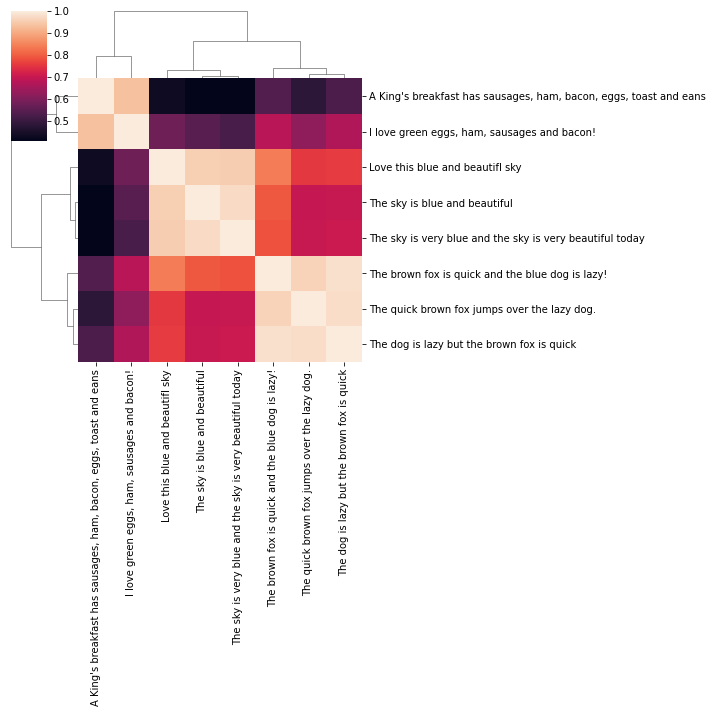

In [15]:
doc_embeddings = [avg_embeddings(doc) for doc in normalized_corpus]
similarity = cosine_similarity(doc_embeddings)
sns.clustermap(similarity, yticklabels=corpus, xticklabels=corpus)

In [16]:
from spacy.lang.en.examples import sentences 

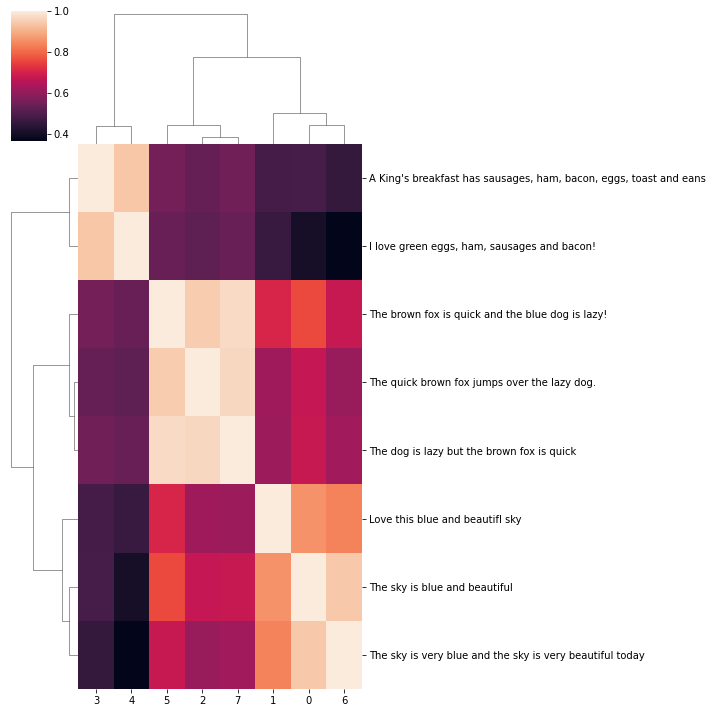

In [17]:
########################
# Spacy
# https://spacy.io/models/en/
# With spacy you don't have to calculate the average embeddings yourself
# We can just ask for the similarity of the first document compared to the second document
# In spacy you seem to have a very feature rich environment
########################
nlp = spacy.load("en_core_web_md")
corpus_nlp = [nlp(str(doc)) for doc in normalized_corpus]
corpus_nlp[0]
corpus_nlp[1]
corpus_nlp[0].similarity(corpus_nlp[1])                 # looking at similarity of the first document to the second document
doc_embeddings = [doc.vector for doc in corpus_nlp]
similarity = cosine_similarity(doc_embeddings)
sns.clustermap(similarity, yticklabels=corpus)